# TITANIC SURVIVE PREDICTION

RMS Titanic was a British ocean liner that sank on 15 April 1912 after striking an iceberg on the ship's maiden voyage from Southampton, England to New York City, United States. Titanic, operated by the White Star Line, was carrying passengers and mail. Of the estimated 2,224 passengers and crew aboard, approximately 1,500 died, making the incident the deadliest sinking of a single ship at the time.
so we have to find how many have survived in that incident.for that we have to train a model with the dataset contain the details available data. The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived..

 so we that dataset we have train the model with randomforest,logistic regression,or any other supervised learning. so the model can learn the dataset and it will predict the survial memebers.

#HERE WE ARE INSTALLING THE REQUIRED LIBRARY

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# HERE  WE  ARE SEEING THE DATASET

In [2]:
df=pd.read_csv("C:/Users/tejes/Downloads/titanic1/train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

# here we checking any null values in the dataset

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\tejes\AppData\Local\Temp\ipykernel_15116\2958808694.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="YlGnBu")


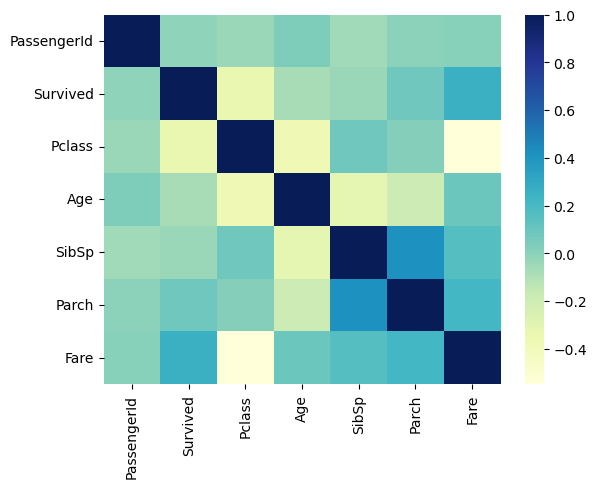

In [7]:
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

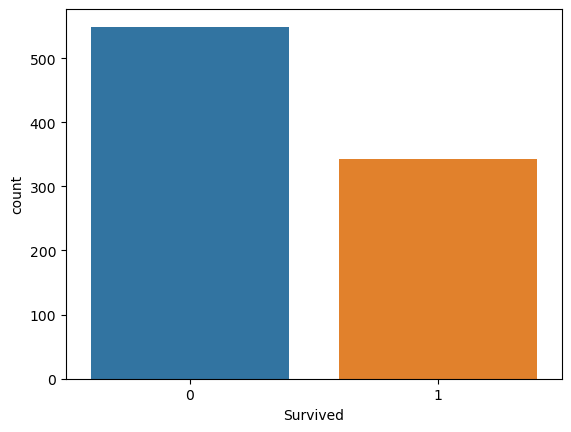

In [8]:
sns.countplot(x="Survived",data=df)

here the graph shows how many member are survived in indicent according into thier tickets class like pclass1, pclass2, pclass3..

<Axes: xlabel='Survived', ylabel='count'>

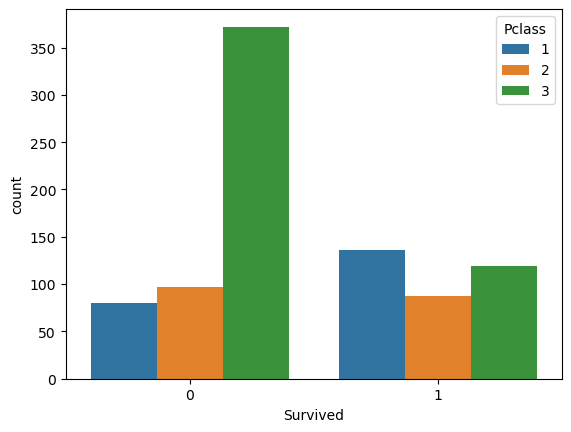

In [9]:
sns.countplot(x="Survived", hue="Pclass",data=df)

here the graph shows the how many have surived in the accident . in that how many males and females.

<Axes: xlabel='Survived', ylabel='count'>

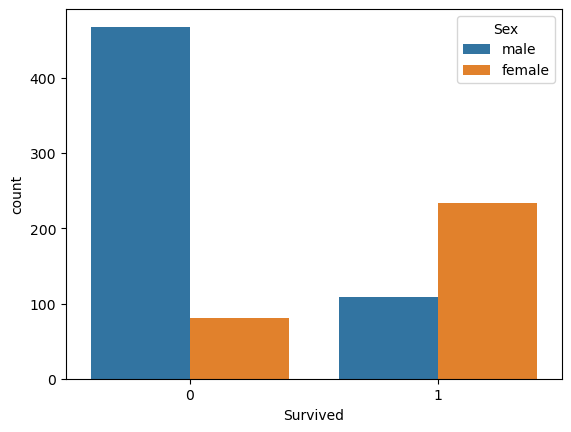

In [10]:
sns.countplot(x="Survived",hue="Sex", data=df)

here we are changing the dataset of sex values in string to boolean values like male-1,female-2..

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Sex']=labelencoder.fit_transform(df['Sex'])

here we are selecting our model algorithm

In [12]:
from sklearn.ensemble import RandomForestClassifier 

In [13]:
X=df[['Pclass','Sex']]
Y=df['Survived']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [15]:
model=RandomForestClassifier(random_state=0)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [16]:
pred=model.predict(x_test)
print(y_test)

495    0
648    0
278    0
31     1
255    1
      ..
263    0
718    0
620    0
786    1
64     0
Name: Survived, Length: 268, dtype: int64


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       168
           1       0.72      0.71      0.71       100

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



In [18]:
from sklearn.metrics import precision_score
precision_score(y_test , pred)

0.7171717171717171

here we are finding the accuracy of the model. by that it we can tell how model is working.

0.7873134328358209


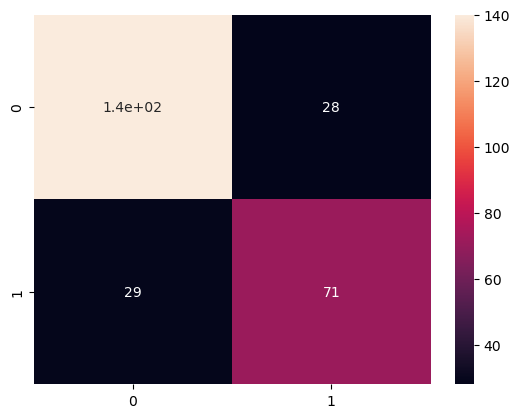

In [19]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , pred)
sns.heatmap(cm , annot=True)
print(accuracy_score(y_test , pred))

we are selecting other model to predict it  

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [22]:
predictions = logmodel.predict(x_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       168
           1       0.72      0.71      0.71       100

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



here we are finding the accuracy of the model. by that it we can tell how model is working.

0.7873134328358209


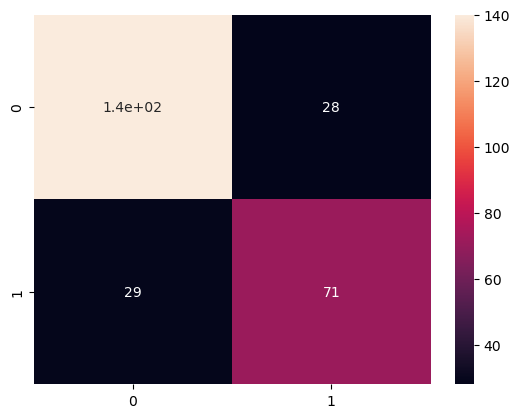

In [24]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , predictions)
sns.heatmap(cm , annot=True)
print(accuracy_score(y_test , predictions))

# CONCLUSION

we have train the model with different algorithm to predict the output. so we have take can the super vised learning algorithm because of the dataset is a label data. so we have train the model with the randomfore3st, and logistic regression. both are having the same accuracy so both model can predict well.